In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from ucimlrepo import fetch_ucirepo

# 1. 导入数据
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets['y']

# 将目标变量 y 合并到 X 中，确保可以进行目标编码
X['y'] = y

# 将 'y' 转换为数值型：'yes' -> 1, 'no' -> 0
X['y'] = X['y'].map({'yes': 1, 'no': 0})

# 2. 识别数值特征和类别特征
numerical_cols = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# 3. 对数值特征进行标准化
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 4. 目标编码：对月份特征进行目标编码（按订阅率计算均值）
month_target_encoding = X.groupby('month')['y'].mean()  # 按月计算订阅率的均值
X['month_encoded'] = X['month'].map(month_target_encoding)  # 将编码值映射到数据中

# 5. 目标编码：对job特征进行目标编码（按订阅率计算均值）
job_target_encoding = X.groupby('job')['y'].mean()  # 按job计算订阅率的均值
X['job_encoded'] = X['job'].map(job_target_encoding)  # 将编码值映射到数据中

# 6. 处理其他类别特征：对其他类别特征进行One-Hot编码
X_processed = pd.get_dummies(X[categorical_cols], drop_first=True)  # One-Hot编码
X_processed[numerical_cols] = X[numerical_cols]  # 将数值特征合并进来

# 7. 使用随机森林进行特征选择
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_processed, y)

# 查看特征重要性
importances = rf.feature_importances_

# 输出特征的重要性
print("Feature Importances:\n", dict(zip(X_processed.columns, importances)))

# 选择重要特征（基于特征重要性，选择重要性大于平均值的特征）
selector = SelectFromModel(rf, threshold="mean", max_features=10)
X_selected = selector.transform(X_processed)

# 输出选择的特征
selected_features = X_processed.columns[selector.get_support()]
print("Selected Features:\n", selected_features)



Feature Importances:
 {'job_blue-collar': 0.00956611324407742, 'job_entrepreneur': 0.003669259897207204, 'job_housemaid': 0.003663146769545863, 'job_management': 0.01100275310343212, 'job_retired': 0.005318183043398411, 'job_self-employed': 0.00500283340313292, 'job_services': 0.006730341043563567, 'job_student': 0.00512840334296373, 'job_technician': 0.01147455040109441, 'job_unemployed': 0.004983655510214327, 'marital_married': 0.012069248099850698, 'marital_single': 0.009844328364988261, 'education_secondary': 0.013523985483262396, 'education_tertiary': 0.012298620050819805, 'default_yes': 0.0017382800279833943, 'housing_yes': 0.02581318326309093, 'loan_yes': 0.010583682838433861, 'contact_telephone': 0.008051710640768952, 'month_aug': 0.011796992467318294, 'month_dec': 0.004823132455362068, 'month_feb': 0.008594626921483639, 'month_jan': 0.007083006099878232, 'month_jul': 0.010056923746565201, 'month_jun': 0.009921109961116632, 'month_mar': 0.014749224563418033, 'month_may': 0.0115

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


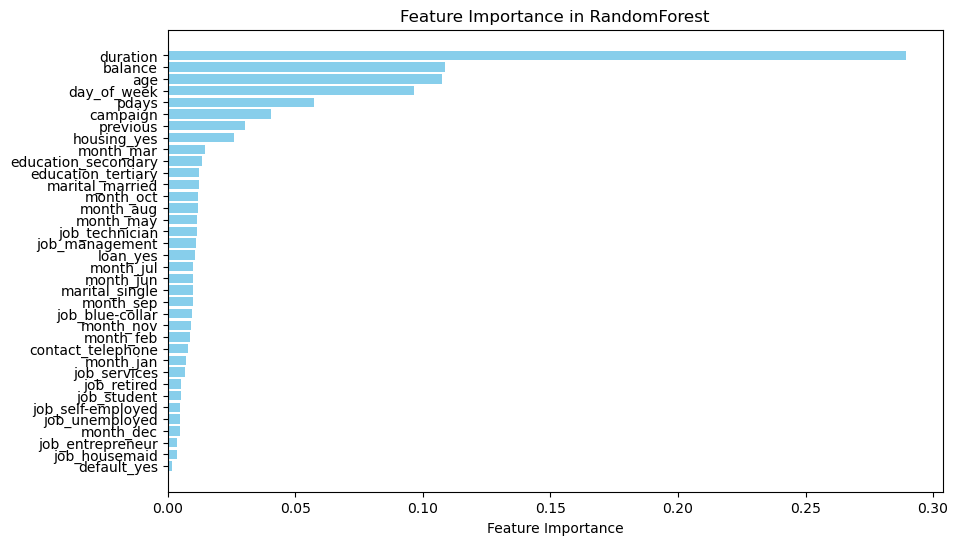

Feature Importance (sorted from smallest to largest):
default_yes: 0.0017
job_housemaid: 0.0037
job_entrepreneur: 0.0037
month_dec: 0.0048
job_unemployed: 0.0050
job_self-employed: 0.0050
job_student: 0.0051
job_retired: 0.0053
job_services: 0.0067
month_jan: 0.0071
contact_telephone: 0.0081
month_feb: 0.0086
month_nov: 0.0092
job_blue-collar: 0.0096
month_sep: 0.0097
marital_single: 0.0098
month_jun: 0.0099
month_jul: 0.0101
loan_yes: 0.0106
job_management: 0.0110
job_technician: 0.0115
month_may: 0.0116
month_aug: 0.0118
month_oct: 0.0120
marital_married: 0.0121
education_tertiary: 0.0123
education_secondary: 0.0135
month_mar: 0.0147
housing_yes: 0.0258
previous: 0.0304
campaign: 0.0406
pdays: 0.0571
day_of_week: 0.0965
age: 0.1076
balance: 0.1085
duration: 0.2893


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# 假设 X_processed 是已经处理过的数值和类别特征数据

# 1. 使用随机森林进行特征选择
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_processed, y)

# 查看特征重要性
importances = rf.feature_importances_

# 按照特征重要性从小到大排序
feature_importances = dict(zip(X_processed.columns, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1])

# 提取排序后的特征和重要性值
sorted_features, sorted_values = zip(*sorted_importances)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_values, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in RandomForest')
plt.show()

# 打印每个特征的重要性
print("Feature Importance (sorted from smallest to largest):")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")


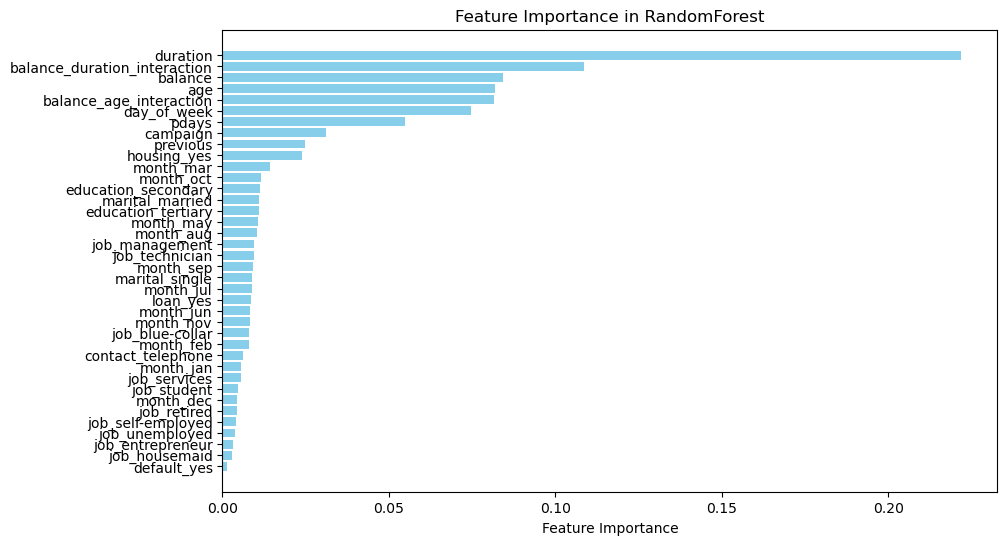

Feature Importance (sorted from smallest to largest):
default_yes: 0.0015
job_housemaid: 0.0030
job_entrepreneur: 0.0031
job_unemployed: 0.0039
job_self-employed: 0.0040
job_retired: 0.0042
month_dec: 0.0043
job_student: 0.0047
job_services: 0.0054
month_jan: 0.0057
contact_telephone: 0.0062
month_feb: 0.0078
job_blue-collar: 0.0081
month_nov: 0.0082
month_jun: 0.0083
loan_yes: 0.0087
month_jul: 0.0088
marital_single: 0.0090
month_sep: 0.0092
job_technician: 0.0095
job_management: 0.0096
month_aug: 0.0102
month_may: 0.0105
education_tertiary: 0.0108
marital_married: 0.0109
education_secondary: 0.0112
month_oct: 0.0116
month_mar: 0.0142
housing_yes: 0.0240
previous: 0.0249
campaign: 0.0311
pdays: 0.0548
day_of_week: 0.0747
balance_age_interaction: 0.0814
age: 0.0817
balance: 0.0844
balance_duration_interaction: 0.1085
duration: 0.2217


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from ucimlrepo import fetch_ucirepo

# 1. 导入数据
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets['y']

# 将目标变量 y 合并到 X 中，确保可以进行目标编码
X['y'] = y

# 将 'y' 转换为数值型：'yes' -> 1, 'no' -> 0
X['y'] = X['y'].map({'yes': 1, 'no': 0})

# 2. 识别数值特征和类别特征
numerical_cols = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# 3. 对数值特征进行标准化
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 4. 合并类别特征：将低频类别合并为 'other'
# 对于 `job` 和 `month` 等类别特征，我们将低频类别替换为 'other'。
def merge_low_frequency_categories(df, columns, threshold=100):
    for col in columns:
        value_counts = df[col].value_counts()
        low_freq_categories = value_counts[value_counts < threshold].index
        df[col] = df[col].replace(low_freq_categories, 'other')
    return df

X = merge_low_frequency_categories(X, ['job', 'month'], threshold=100)

# 5. 目标编码：对月份特征进行目标编码（按订阅率计算均值）
month_target_encoding = X.groupby('month')['y'].mean()  # 按月计算订阅率的均值
X['month_encoded'] = X['month'].map(month_target_encoding)  # 将编码值映射到数据中

# 6. 目标编码：对job特征进行目标编码（按订阅率计算均值）
job_target_encoding = X.groupby('job')['y'].mean()  # 按job计算订阅率的均值
X['job_encoded'] = X['job'].map(job_target_encoding)  # 将编码值映射到数据中

# 7. 处理其他类别特征：对其他类别特征进行One-Hot编码
X_processed = pd.get_dummies(X[categorical_cols], drop_first=True)  # One-Hot编码
X_processed[numerical_cols] = X[numerical_cols]  # 将数值特征合并进来

# 8. 特征交互：创建数值特征之间的交互特征
X_processed['balance_age_interaction'] = X_processed['balance'] * X_processed['age']
X_processed['balance_duration_interaction'] = X_processed['balance'] * X_processed['duration']

# 9. 使用随机森林进行特征选择
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_processed, y)

# 查看特征重要性
importances = rf.feature_importances_

# 按照特征重要性从小到大排序
feature_importances = dict(zip(X_processed.columns, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1])

# 提取排序后的特征和重要性值
sorted_features, sorted_values = zip(*sorted_importances)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_values, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in RandomForest')
plt.show()

# 打印每个特征的重要性
print("Feature Importance (sorted from smallest to largest):")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")


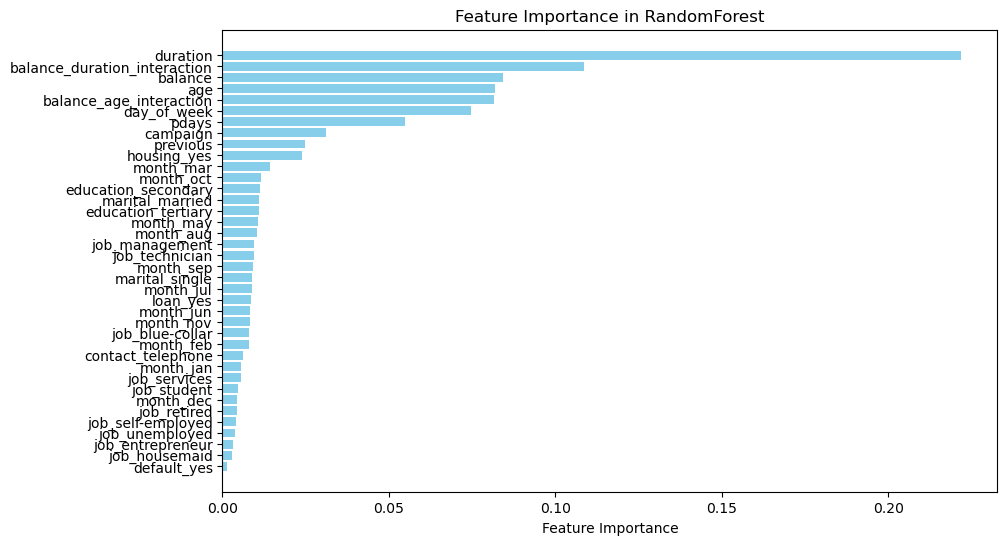

Feature Importance (sorted from smallest to largest):
default_yes: 0.0015
job_housemaid: 0.0030
job_entrepreneur: 0.0031
job_unemployed: 0.0039
job_self-employed: 0.0040
job_retired: 0.0042
month_dec: 0.0043
job_student: 0.0047
job_services: 0.0054
month_jan: 0.0057
contact_telephone: 0.0062
month_feb: 0.0078
job_blue-collar: 0.0081
month_nov: 0.0082
month_jun: 0.0083
loan_yes: 0.0087
month_jul: 0.0088
marital_single: 0.0090
month_sep: 0.0092
job_technician: 0.0095
job_management: 0.0096
month_aug: 0.0102
month_may: 0.0105
education_tertiary: 0.0108
marital_married: 0.0109
education_secondary: 0.0112
month_oct: 0.0116
month_mar: 0.0142
housing_yes: 0.0240
previous: 0.0249
campaign: 0.0311
pdays: 0.0548
day_of_week: 0.0747
balance_age_interaction: 0.0814
age: 0.0817
balance: 0.0844
balance_duration_interaction: 0.1085
duration: 0.2217


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


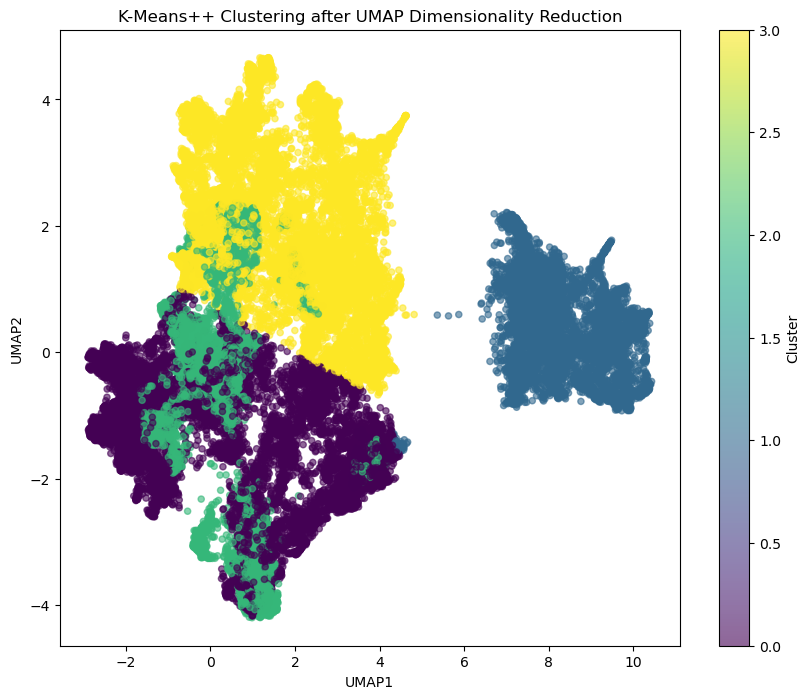

Cluster Summary (Numerical Features):
                 y       age   balance  day_of_week  duration  campaign  \
Cluster                                                                  
0        0.126655 -0.302658 -0.208031     0.194261  0.172701 -0.059787   
1        0.215104 -0.037003 -0.050134    -0.201836 -0.036488 -0.224419   
2        0.042904 -0.131152 -0.221243    -0.051308 -0.084963 -0.154584   
3        0.104485  0.379898  0.355372    -0.044983 -0.087947  0.265356   

            pdays  previous  
Cluster                      
0       -0.396774 -0.238504  
1        1.950081  1.172365  
2       -0.405581 -0.244932  
3       -0.369782 -0.221651  
Cluster Mode (Categorical Features):
                  job  marital  education default housing loan   contact month
Cluster                                                                      
0         management   single  secondary      no     yes   no  cellular   jul
1         management  married  secondary      no     yes   no  c

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from ucimlrepo import fetch_ucirepo

# 1. 导入数据
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets['y']

# 将目标变量 y 合并到 X 中，确保可以进行目标编码
X['y'] = y

# 将 'y' 转换为数值型：'yes' -> 1, 'no' -> 0
X['y'] = X['y'].map({'yes': 1, 'no': 0})

# 2. 识别数值特征和类别特征
numerical_cols = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# 3. 对数值特征进行标准化
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 4. 合并类别特征：将低频类别合并为 'other'
def merge_low_frequency_categories(df, columns, threshold=100):
    for col in columns:
        value_counts = df[col].value_counts()
        low_freq_categories = value_counts[value_counts < threshold].index
        df[col] = df[col].replace(low_freq_categories, 'other')
    return df

# 处理类别特征，合并低频类别
X = merge_low_frequency_categories(X, ['job', 'month'], threshold=100)

# 5. 目标编码：对月份特征进行目标编码（按订阅率计算均值）
month_target_encoding = X.groupby('month')['y'].mean()  # 按月计算订阅率的均值
X['month_encoded'] = X['month'].map(month_target_encoding)  # 将编码值映射到数据中

# 6. 目标编码：对job特征进行目标编码（按订阅率计算均值）
job_target_encoding = X.groupby('job')['y'].mean()  # 按job计算订阅率的均值
X['job_encoded'] = X['job'].map(job_target_encoding)  # 将编码值映射到数据中

# 7. 处理其他类别特征：对其他类别特征进行One-Hot编码
X_processed = pd.get_dummies(X[categorical_cols], drop_first=True)  # One-Hot编码
X_processed[numerical_cols] = X[numerical_cols]  # 将数值特征合并进来

# 8. 特征交互：创建数值特征之间的交互特征
X_processed['balance_age_interaction'] = X_processed['balance'] * X_processed['age']
X_processed['balance_duration_interaction'] = X_processed['balance'] * X_processed['duration']

# 9. 使用随机森林进行特征选择
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_processed, y)

importances = rf.feature_importances_

# 按照特征重要性从小到大排序
feature_importances = dict(zip(X_processed.columns, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1])

# 提取排序后的特征和重要性值
sorted_features, sorted_values = zip(*sorted_importances)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_values, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in RandomForest')
plt.show()

# 打印每个特征的重要性
print("Feature Importance (sorted from smallest to largest):")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

# 10. 使用 UMAP 进行降维
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_model.fit_transform(X_processed)

# 将降维后的数据合并回原数据集
X_umap_df = pd.DataFrame(X_umap, columns=[f'UMAP{i+1}' for i in range(3)])
X = pd.concat([X, X_umap_df], axis=1)

# 11. 聚类：K-Means++
kmeans_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters_kmeans = kmeans_plus.fit_predict(X_umap_df)  # 使用降维后的数据进行聚类

# 可视化聚类结果（降维后的数据）
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_kmeans, cmap='viridis', s=20, alpha=0.6)
plt.title('K-Means++ Clustering after UMAP Dimensionality Reduction')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(label='Cluster')
plt.show()

# 12. 聚类分析：查看每个簇的订阅率（y）和特征均值
X_raw = X.copy()
X_raw['Cluster'] = clusters_kmeans

# 聚类统计信息（数值特征均值）
cluster_summary = X_raw.groupby('Cluster').agg({
    'y': 'mean',  # 计算每个簇的订阅率均值
    **{col: 'mean' for col in numerical_cols}  # 计算每个簇的数值型特征均值
})
print("Cluster Summary (Numerical Features):\n", cluster_summary)

# 聚类统计信息（类别特征的众数）
cluster_mode = X_raw.groupby('Cluster').agg({
    **{col: lambda x: x.mode()[0] for col in categorical_cols}  # 计算每个簇的类别特征的众数
})
print("Cluster Mode (Categorical Features):\n", cluster_mode)

# 13. 评估聚类效果：计算轮廓系数（Silhouette Score）
silhouette_avg = silhouette_score(X_umap, clusters_kmeans)
print(f"Silhouette Score for K-Means++: {silhouette_avg:.4f}")

# 14. 评估聚类效果：计算 Davies-Bouldin指数
db_score = davies_bouldin_score(X_umap, clusters_kmeans)
print(f"Davies-Bouldin Score for K-Means++: {db_score:.4f}")

# 15. 评估聚类效果：计算 Calinski-Harabasz指数
ch_score = calinski_harabasz_score(X_umap, clusters_kmeans)
print(f"Calinski-Harabasz Score for K-Means++: {ch_score:.4f}")

# 16. 保存最终聚类结果
X_raw.to_csv('umap_kmeans_plus_clustered_data.csv', index=False)
